In [101]:
import pandas
import altair as alt
from scipy.optimize import curve_fit
import numpy
import datetime

In [102]:
data = pandas.read_csv("https://covidtracking.com/api/states/daily.csv")
data['date'] =  pandas.to_datetime(data['date'], format='%Y%m%d')
data = data[data['state'] == 'NY'][['date','positive','negative']].sort_values('date')


In [103]:
data['new cases'] = data['positive'].diff()

In [104]:
data

,date,positive,negative,new cases
1143,2020-03-04,6.0,48.0,NaN
1126,2020-03-05,22.0,76.0,16.0
1099,2020-03-06,33.0,92.0,11.0
1058,2020-03-07,76.0,92.0,43.0
1007,2020-03-08,105.0,92.0,29.0
956,2020-03-09,142.0,92.0,37.0
905,2020-03-10,173.0,92.0,31.0
854,2020-03-11,216.0,92.0,43.0
803,2020-03-12,216.0,92.0,0.0
752,2020-03-13,421.0,2779.0,205.0


In [105]:
melted = data.melt('date')

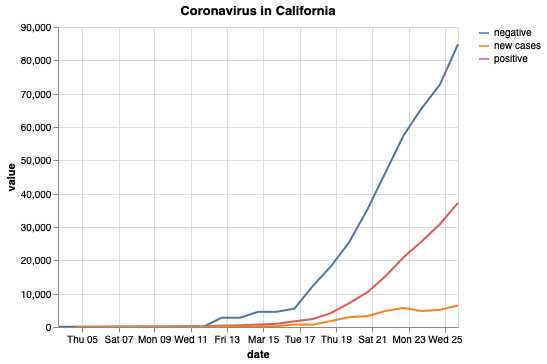

In [106]:
alt.Chart(melted).mark_line().encode(
    x='date',
    y='value',
    color=alt.Color('variable', legend=alt.Legend(title=""))
).properties(
    title='Coronavirus in California'
)

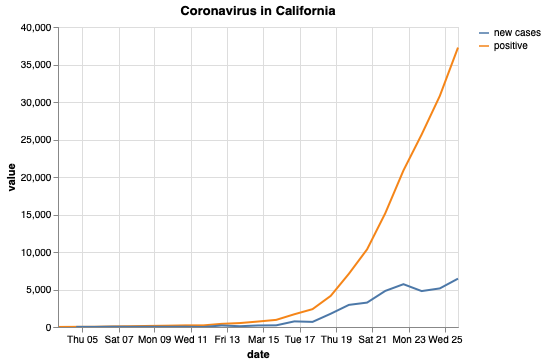

In [107]:
alt.Chart(melted[melted['variable']!='negative']).mark_line().encode(
    x='date',
    y='value',
    color=alt.Color('variable', legend=alt.Legend(title=""))
).properties(
    title='Coronavirus in California'
)

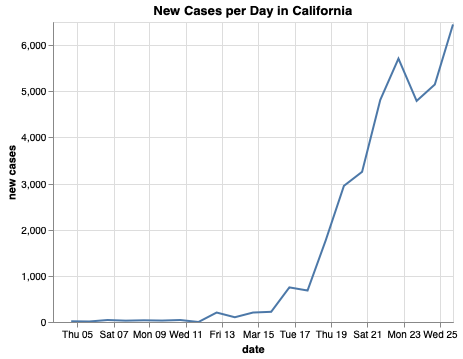

In [108]:
alt.Chart(data).mark_line().encode(
    x='date',
    y='new cases'
).properties(
    title='New Cases per Day in California'
)